In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
f = open('chat.txt', 'r', encoding = 'utf-8')

In [3]:
data = f.read()

In [4]:
# print(data)

In [5]:
pattern = '\d{1,2}/\d{1,2}/\d{1,4},\s\d{1,2}:\d{1,2}\s[AaPp][Mm]\s-\s'

In [6]:
messages = re.split(pattern, data)[1:]

# messages

In [7]:
dates = re.findall(pattern, data)

# dates

In [8]:
print('messages', len(messages))
print('dates', len(dates))

messages 3019
dates 3019


In [9]:
df = pd.DataFrame({'user_message' : messages, 'date' : dates})

df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,"12/19/21, 11:09 PM -"
1,Ankita: Kidhr h tu\n,"12/19/21, 11:09 PM -"
2,Shubham😎: 🚂\n,"12/20/21, 12:18 AM -"
3,Ankita: Train m\n,"12/20/21, 12:18 AM -"
4,Ankita: 🤗\n,"12/20/21, 12:18 AM -"


In [10]:
df['date'] = pd.to_datetime(df['date'], format = '%m/%d/%y, %I:%M %p - ')

In [11]:
df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2021-12-19 23:09:00
1,Ankita: Kidhr h tu\n,2021-12-19 23:09:00
2,Shubham😎: 🚂\n,2021-12-20 00:18:00
3,Ankita: Train m\n,2021-12-20 00:18:00
4,Ankita: 🤗\n,2021-12-20 00:18:00


In [12]:
df.tail()

,user_message,date
3014,Shubham😎: 😎\n,2022-01-23 23:30:00
3015,Ankita: 🤘🏻ok\n,2022-01-23 23:30:00
3016,Shubham😎: Sorry 🙃\n,2022-01-23 23:31:00
3017,Ankita: Purso sham ko\n,2022-01-25 15:56:00
3018,Ankita: Free rhoge\n,2022-01-25 15:56:00


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_message  3019 non-null   object        
 1   date          3019 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 47.3+ KB


In [14]:
df['user_message'] = df['user_message'].str.strip()

df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2021-12-19 23:09:00
1,Ankita: Kidhr h tu,2021-12-19 23:09:00
2,Shubham😎: 🚂,2021-12-20 00:18:00
3,Ankita: Train m,2021-12-20 00:18:00
4,Ankita: 🤗,2021-12-20 00:18:00


In [15]:
# separate users and messages
    
users = []
messages = []

for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('chat_notification')
        messages.append(entry[0])
        

df['users'] = users
df['messages'] = messages
df.drop(columns = ['user_message'], inplace = True)

df.head()

,date,users,messages
0,2021-12-19 23:09:00,chat_notification,Messages and calls are end-to-end encrypted. N...
1,2021-12-19 23:09:00,Ankita,Kidhr h tu
2,2021-12-20 00:18:00,Shubham😎,🚂
3,2021-12-20 00:18:00,Ankita,Train m
4,2021-12-20 00:18:00,Ankita,🤗


In [16]:
# extracting year, month, day, hour, minute separately

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['day_name'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute
df['date'] = df['date'].dt.date

df.head()

,date,users,messages,year,month,day,day_name,hour,minute
0,2021-12-19,chat_notification,Messages and calls are end-to-end encrypted. N...,2021,December,19,Sunday,23,9
1,2021-12-19,Ankita,Kidhr h tu,2021,December,19,Sunday,23,9
2,2021-12-20,Shubham😎,🚂,2021,December,20,Monday,0,18
3,2021-12-20,Ankita,Train m,2021,December,20,Monday,0,18
4,2021-12-20,Ankita,🤗,2021,December,20,Monday,0,18


In [17]:
df[df['users'] == 'Ankita'].shape

(1585, 9)

In [18]:
words = []

for message in df['messages']:
    words.extend(message.split())
    
print(len(words))

14744


In [19]:
df[df['messages'] == '<Media omitted>'].shape

(21, 9)

In [20]:
from urlextract import URLExtract

extractor = URLExtract()

links = []

for message in df['messages']:
    links.extend(extractor.find_urls(message))
 
print('Total links :', len(links))
print(links)

Total links : 7
['https://gaana.com/song/hoye-ishq-na-from-tadap', 'https://youtu.be/K37vU4gIcEs', 'https://play.google.com/store/apps/details?id=share.zender.appshare', 'Hmm.ye', 'https://youtu.be/TMtzwzvPlWE', 'https://youtu.be/STB_BEyT3Tg', 'https://youtu.be/ibji031MUzU']


In [21]:
x = df['users'].value_counts()

In [22]:
import matplotlib.pyplot as plt

name = x.index
count = x.values

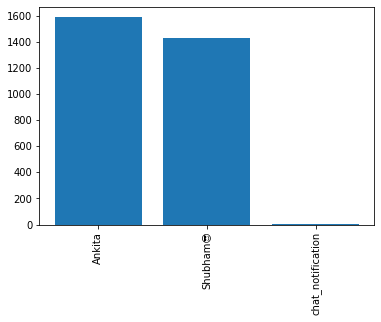

In [23]:
plt.bar(name, count)
plt.xticks(rotation = 'vertical')
plt.show()

In [24]:
round((df['users'].value_counts(normalize = True))*100, 2).reset_index().rename(columns = {'index' : 'name', 'users' : 'percent'})

,name,percent
0,Ankita,52.50
1,Shubham😎,47.37
2,chat_notification,0.13


In [25]:
words = []

for message in df['messages']:
    words.extend(message.split())

In [26]:
from collections import Counter

pd.DataFrame(Counter(words).most_common(20), columns = ['word', 'num_occurence'])

,word,num_occurence
0,h,516
1,ni,365
2,hi,217
3,se,170
4,to,166
5,toh,165
6,m,152
7,bhi,136
8,tha,127
9,me,123


In [27]:
# we can remove group messages, media omitted messages and stop words

temp = df[df['users'] != 'chat_notification']

temp = temp[temp['messages'] != '<Media omitted>']

temp.head()

,date,users,messages,year,month,day,day_name,hour,minute
1,2021-12-19,Ankita,Kidhr h tu,2021,December,19,Sunday,23,9
2,2021-12-20,Shubham😎,🚂,2021,December,20,Monday,0,18
3,2021-12-20,Ankita,Train m,2021,December,20,Monday,0,18
4,2021-12-20,Ankita,🤗,2021,December,20,Monday,0,18
5,2021-12-20,Shubham😎,Hanji,2021,December,20,Monday,0,19


In [28]:
# nltk can remove english stop words 
# our chats usually contains hinglish words

f = open('stop_hinglish.txt', 'r')
stop_words = f.read()
print(stop_words)

.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
coul

In [29]:
words = []

for message in temp['messages']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

In [30]:
pd.DataFrame(Counter(words).most_common(20), columns = ['word', 'num_occurrence'])

,word,num_occurrence
0,😅,60
1,yr,47
2,baat,46
3,tuje,46
4,gyi,42
5,pta,41
6,muje,41
7,gya,35
8,abi,31
9,phr,29


In [31]:
import emoji

emojis = []

for message in df['messages']:
#     emojis.extend([c for c in message if emoji.is_emoji(c)])
    for word in message:
        if emoji.is_emoji(word):
            emojis.extend(word)

In [32]:
pd.DataFrame(Counter(emojis).most_common(20), columns = ['emoji', 'num_occurrence'])

,emoji,num_occurrence
0,😂,150
1,🤣,146
2,😅,61
3,🙄,33
4,😆,24
5,😍,23
6,🙂,20
7,🤩,18
8,🤗,17
9,🙈,15


In [33]:
monthly_timeline = df.groupby(['year', 'month']).count()['messages'].reset_index()
monthly_timeline.head()

,year,month,messages
0,2021,December,1286
1,2022,January,1733


In [34]:
month_year = []

for i in range(monthly_timeline.shape[0]):
    month_year.append(monthly_timeline['month'][i] + '-' + str(monthly_timeline['year'][i]))

In [35]:
month_year

['December-2021', 'January-2022']

In [36]:
monthly_timeline['month_year'] = month_year
monthly_timeline.head()

,year,month,messages,month_year
0,2021,December,1286,December-2021
1,2022,January,1733,January-2022


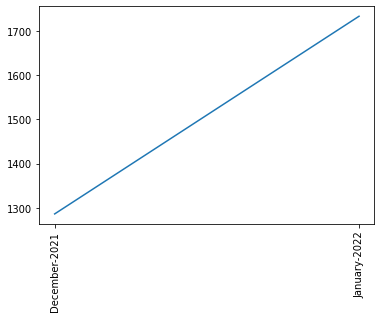

In [37]:
plt.plot(monthly_timeline['month_year'], monthly_timeline['messages'])
plt.xticks(rotation = 'vertical')
plt.show()

In [38]:
daily_timeline = df.groupby('date').count()['messages'].reset_index()
daily_timeline.head()

,date,messages
0,2021-12-19,2
1,2021-12-20,8
2,2021-12-21,5
3,2021-12-22,5
4,2021-12-24,262


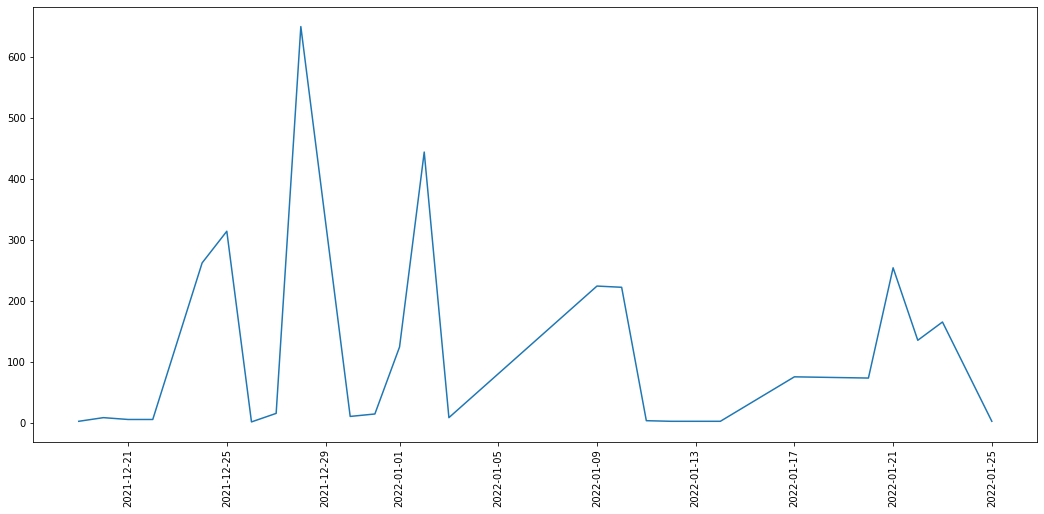

In [39]:
plt.figure(figsize = (18,8))

plt.plot(daily_timeline['date'], daily_timeline['messages'])
plt.xticks(rotation = 'vertical')
plt.show()

In [40]:
df['day_name'].value_counts()

Sunday       836
Tuesday      660
Saturday     573
Friday       532
Monday       328
Thursday      83
Wednesday      7
Name: day_name, dtype: int64

In [41]:
df['month'].value_counts()

January     1733
December    1286
Name: month, dtype: int64

In [42]:
period = []

for hour in df['hour']:
    if hour == 23:
        period.append(str(hour) + '-' + str('0'))
    elif hour == 0:
        period.append(str('0') + '-' + str(hour+1))
    else:
        period.append(str(hour) + '-' + str(hour+1))

In [43]:
df['period'] = period
df.head()

,date,users,messages,year,month,day,day_name,hour,minute,period
0,2021-12-19,chat_notification,Messages and calls are end-to-end encrypted. N...,2021,December,19,Sunday,23,9,23-0
1,2021-12-19,Ankita,Kidhr h tu,2021,December,19,Sunday,23,9,23-0
2,2021-12-20,Shubham😎,🚂,2021,December,20,Monday,0,18,0-1
3,2021-12-20,Ankita,Train m,2021,December,20,Monday,0,18,0-1
4,2021-12-20,Ankita,🤗,2021,December,20,Monday,0,18,0-1


In [44]:
df.pivot_table(index = 'day_name', columns = 'period', values = 'messages', aggfunc = 'count').fillna(0)

period,0-1,1-2,11-12,12-13,13-14,14-15,15-16,16-17,17-18,18-19,19-20,20-21,21-22,22-23,23-0,8-9,9-10
day_name,,,,,,,,,,,,,,,,,
Friday,142.0,91.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,17.0,1.0,1.0,273.0,0.0,2.0
Monday,216.0,0.0,4.0,2.0,6.0,0.0,1.0,0.0,0.0,37.0,32.0,0.0,0.0,10.0,19.0,0.0,1.0
Saturday,323.0,52.0,8.0,1.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,7.0,0.0,2.0,176.0,0.0,0.0
Sunday,108.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,4.0,285.0,126.0,12.0,12.0,75.0,205.0,2.0,2.0
Thursday,0.0,0.0,4.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,0.0,0.0
Tuesday,273.0,136.0,0.0,0.0,5.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,142.0,0.0,0.0
Wednesday,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0


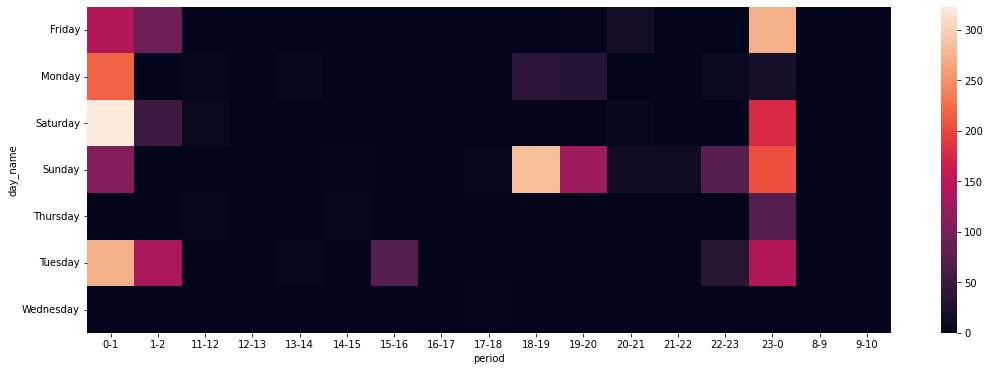

In [45]:
import seaborn as sns

plt.figure(figsize = (18,6))
sns.heatmap(df.pivot_table(index = 'day_name', columns = 'period', values = 'messages', aggfunc = 'count').fillna(0))
plt.yticks(rotation = 'horizontal')
plt.show()